In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Downloads/mcdonalds.csv')

In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.shape

(1453, 15)

In [5]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
df2 = df.iloc[:,:11].apply(lambda x: np.where(x=='Yes',1,0))
print(df2.mean(axis=0).round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=11)
pca_features = pca_df.fit_transform(df2)

In [8]:
pca_features

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [9]:
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca_df.explained_variance_),
    'Proportion of Variance': pca_df.explained_variance_ratio_,
    'Cumulative Proportion': pca_df.explained_variance_ratio_.cumsum()
}).T

for i in summary_df.columns:
    summary_df.rename(columns ={i:f"PC{i+1}"}, inplace=True)
    
print(summary_df)

                             PC1       PC2       PC3       PC4       PC5  \
Standard deviation      0.757050  0.607456  0.504619  0.398799  0.337405   
Proportion of Variance  0.299447  0.192797  0.133045  0.083096  0.059481   
Cumulative Proportion   0.299447  0.492244  0.625290  0.708386  0.767866   

                             PC6       PC7       PC8       PC9      PC10  \
Standard deviation      0.310275  0.289697  0.275122  0.265251  0.248842   
Proportion of Variance  0.050300  0.043849  0.039548  0.036761  0.032353   
Cumulative Proportion   0.818166  0.862015  0.901563  0.938323  0.970677   

                            PC11  
Standard deviation      0.236903  
Proportion of Variance  0.029323  
Cumulative Proportion   1.000000  


In [10]:
pca_matrix = pd.DataFrame(pca_df.components_, columns = df2.columns).T
for i in pca_matrix.columns:
    pca_matrix.rename(columns ={i:f"PC{i+1}"}, inplace=True)
pca_matrix=pca_matrix*-1
print(pca_matrix)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444 -0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515  0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019 -0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359  0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373 -0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642  0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310 -0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265  0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397 -0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051 -0.763488 -0.287846  0.178226   
disgusting -0.374753  0.139656  0.088571 -0.369539  0.729209  0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy       0.280519 -0.013041 -0.572403  0.1102

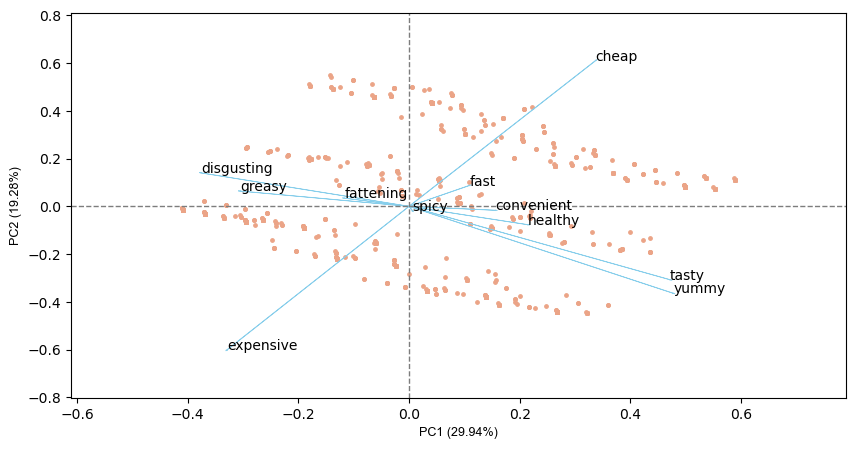

In [11]:
#!pip install bioinfokit
from bioinfokit.visuz import cluster
ax = cluster.biplot(cscore=pca_features, loadings=-1*pca_df.components_, labels=df.columns.values, 
               var1=round(pca_df.explained_variance_ratio_[0]*100,2), var2=round(pca_df.explained_variance_ratio_[1]*100,2),show=True,dim=(10,5))


In [12]:
from sklearn.cluster import KMeans
wcss = []
np.random.seed(1234)
for i in range(2,9):
    k_mean = KMeans(n_clusters=i, n_init=10)
    k_mean.fit(df2)
    silh_ped = k_mean.fit_predict(df2)
    wcss.append(k_mean.inertia_)

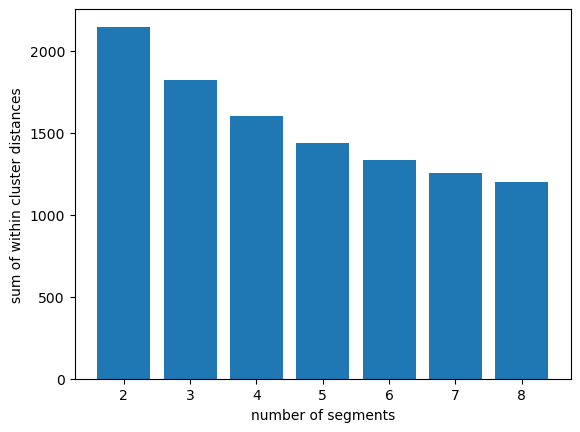

In [13]:
plt.bar(range(2,9), wcss)
plt.ylabel("sum of within cluster distances")
plt.xlabel("number of segments")
plt.show()

In [14]:
df['cluster_label'] = k_mean.labels_

In [15]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_label
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,6
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,2
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,7
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,1
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,4
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,2
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,0


In [16]:
#df.Like.unique()
df['Like'] = np.where(df['Like']== 'I love it!+5', '+5', df['Like'])
df['Like'] = np.where(df['Like']== 'I hate it!-5', '-5', df['Like'])

In [17]:
df3 = pd.concat([df2, df['Like']], axis=1)
df3

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like
0,0,1,0,1,0,1,1,0,1,0,0,-3
1,1,1,0,1,1,1,1,1,1,0,0,+2
2,0,1,1,1,1,1,0,1,1,1,0,+1
3,1,1,0,1,1,1,1,1,0,0,1,+4
4,0,1,0,1,1,1,1,0,0,1,0,+2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5
1449,1,1,0,1,0,0,1,1,0,1,0,+2
1450,1,1,0,1,0,1,0,1,1,0,0,+3
1451,1,1,0,0,0,1,1,1,0,1,0,+4


In [18]:
like_cluster = pd.crosstab(index=df['cluster_label'], columns=df['Like'])
like_cluster

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
cluster_label,,,,,,,,,,,
0,9,14,29,29,36,0,1,1,0,0,5
1,5,4,4,0,0,9,13,22,25,74,25
2,28,47,57,36,34,3,5,6,2,5,24
3,24,21,3,1,0,19,23,22,24,44,37
4,36,40,73,47,37,4,1,1,3,2,26
5,18,12,11,5,1,8,8,8,2,11,20
6,8,10,6,1,0,8,4,12,14,15,18
7,24,39,46,41,35,7,4,1,1,1,14


In [19]:
np.random.seed(1234)

import statsmodels.api as sm

X = df3.drop(columns=['Like'])
X = sm.add_constant(X)

y = df3[['Like']].astype(int)

result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          4.03e-296
Time:                        01:54:49   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9242      0.280     -6.884      0.0

<Axes: >

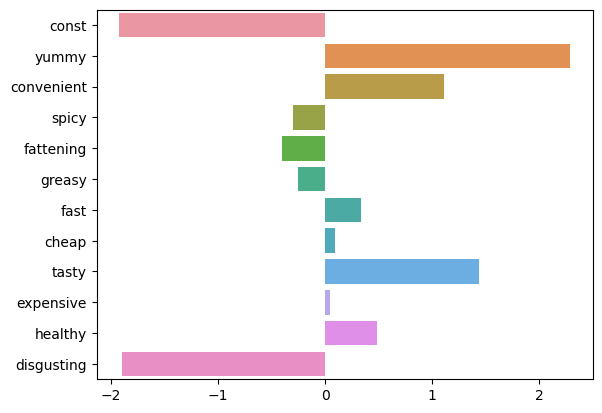

In [20]:
ind = result.params.index
val = result.params.values
sns.barplot(y = ind, x = val)

In [21]:
np.random.seed(1234)
k_mean_fr = KMeans(n_clusters=4, n_init=10)
k_mean_fr.fit(df2)

KMeans(n_clusters=4, n_init=10)

In [22]:
df['four_cluster_label'] = k_mean_fr.labels_

In [23]:
df4 = pd.concat([df2, df['four_cluster_label']], axis=1)
df4.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,four_cluster_label
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,1


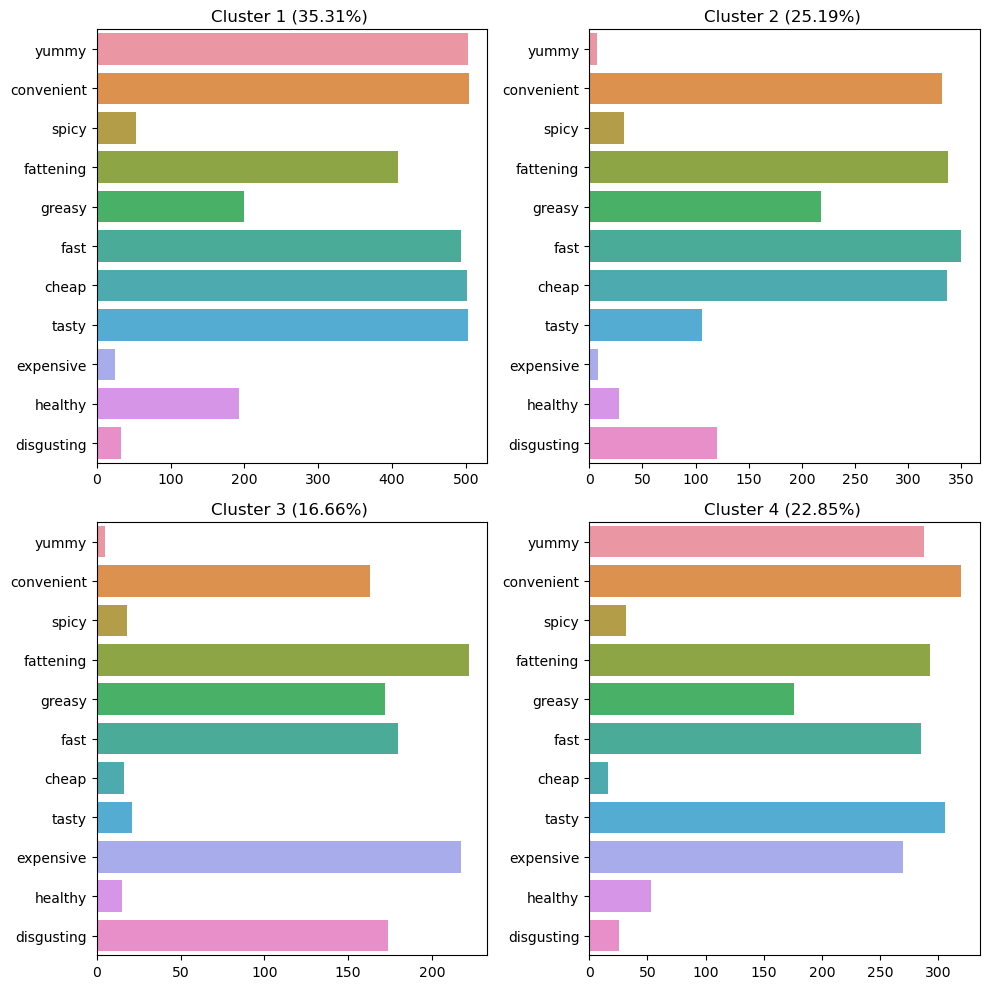

In [24]:
fig, ax = plt.subplots(2,2,figsize= (10,10))
ax = ax.ravel()
for i in range(0,4):
    col = df4[df4['four_cluster_label']==i].groupby(['four_cluster_label']).sum().columns
    val = df4[df4['four_cluster_label']==i].groupby(['four_cluster_label']).sum().values[0]
    ind = df4[df4['four_cluster_label']==i].groupby(['four_cluster_label']).sum().index
    sns.barplot(x =val, y = col, ax = ax[i])
    count_per = (df4['four_cluster_label'].value_counts(normalize=True)[i]*100).round(2)
    ax[i].set_title(f"Cluster {i+1} ({count_per}%) ")
    plt.tight_layout()
plt.show()

In [25]:
like_cluster = pd.crosstab(index=df['four_cluster_label'], columns=df['Like'])
like_cluster

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
four_cluster_label,,,,,,,,,,,
0,45,76,134,107,102,7,5,0,3,2,32
1,48,40,16,3,0,31,30,37,38,56,67
2,14,7,8,0,0,12,18,31,27,89,36
3,45,64,71,50,41,8,6,5,3,5,34


<Figure size 2000x2000 with 0 Axes>

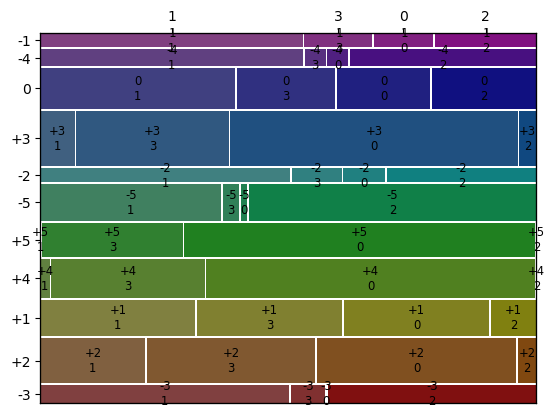

In [26]:
plt.figure(figsize=(20,20))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data = df, index = ['Like', 'four_cluster_label'], horizontal=False)
plt.show()

<Figure size 2000x2000 with 0 Axes>

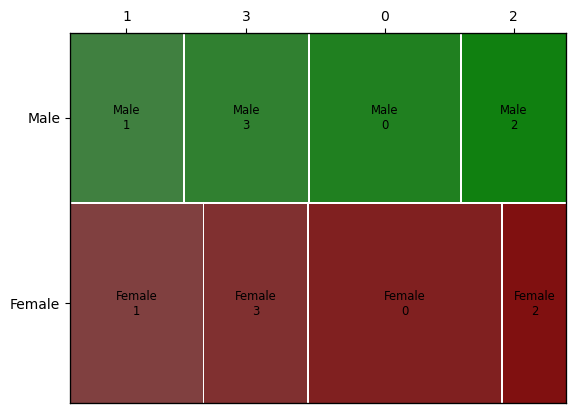

In [27]:
plt.figure(figsize=(20,20))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data = df, index = ['Gender', 'four_cluster_label'], horizontal=False)
plt.show()

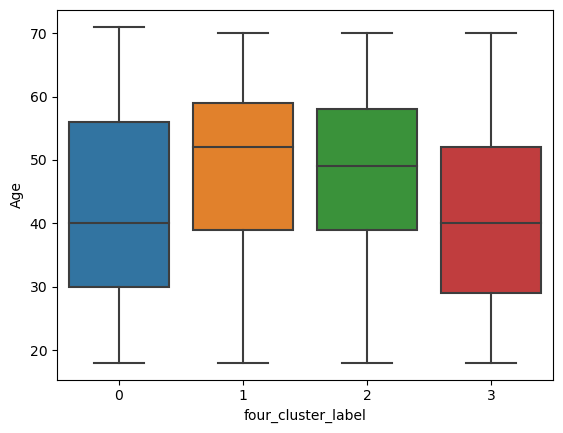

In [28]:
sns.boxplot(x = df['four_cluster_label'], y = df['Age'])
plt.show()